# Imports

In [1]:
import logging
from pathlib import Path
import gc

In [2]:
from dataclasses import dataclass

In [3]:
import numpy as np
from matplotlib import pyplot as plt

In [4]:
import torch

In [5]:
from imagelib import Im

In [6]:
import test

In [7]:
from classifier import Net

---

In [8]:
%load_ext rich

In [9]:
%load_ext autoreload
%autoreload 1

In [10]:
%aimport imagelib

In [11]:
%aimport test

In [12]:
%aimport classifier

## Config

In [13]:
np.set_printoptions(linewidth=1000)

In [14]:
plt.set_loglevel('error')

In [15]:
logging.basicConfig(level=logging.DEBUG)

In [16]:
logging.getLogger("imagelib").setLevel(logging.INFO)

In [17]:
logging.getLogger("test").setLevel(logging.DEBUG)

# Main

In [18]:
file_name = "temp.png"
category = "random_mnist"
base_dir = "data"

target = "combinations_cuda"

label_prefix = "sketch of number"

gridcell_size = 8
grid_width = 28
grid_height = 28
threshold_ratio = 0.

convert = '1'
invert = False
skeleton = False

p = 0.045
seed = 4

render_w_grid = False
render_type = "circles"

model_name = 'net'
device = "cuda"

overwrite = True
overwrite_plot = True
overwrite_animation = True

frames = 1000
interval = 50

In [19]:
if device == "cuda":
    # Empty cache and collect garbage
    torch.cuda.empty_cache()
    gc.collect()
    torch.cuda.memory_summary("cuda", abbreviated=True)

In [20]:
model_ = 'results/__models/mnist_cnn_60000-10000-0-0-0-10000-0-0-random-128-8-0.001-1.0-True-0.045-5-True-True-8-28-28-0.0-False-circles-False-True-False.pt'
model, preprocess = Net.load(model_, device=device)

---

In [21]:
file = Im(file_name, category, base_dir=base_dir, create='random', convert=convert, invert=invert, skeleton=skeleton, width=grid_width, height=grid_height, p=p, seed=seed)
file.register(grid_width, grid_height, gridcell_size, threshold_ratio=threshold_ratio, object_persistency=1, seed=seed, render_w_grid=render_w_grid, render_type=render_type)
image = file.get_grid_image()

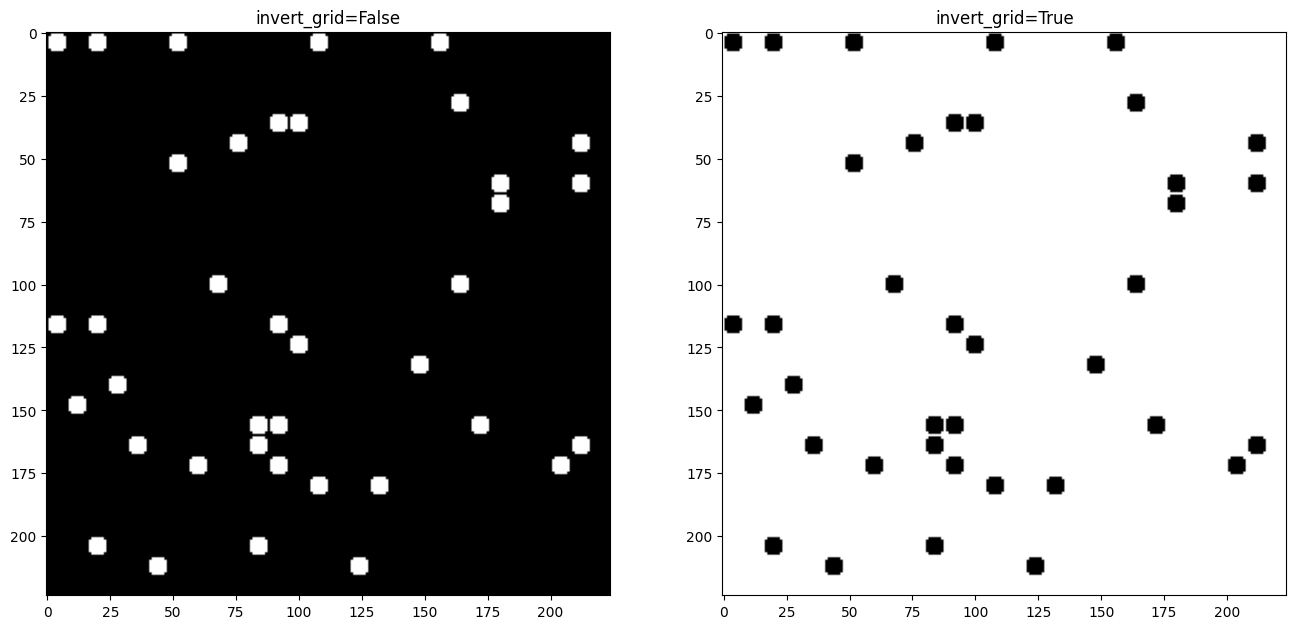

In [22]:
fig, axs = plt.subplots(1, 2, figsize=(16, 8))
for ax, invert_grid in zip(axs, (False, True)):
    ax.imshow(file.get_grid_image(invert=invert_grid))
    ax.set_title(f"{invert_grid=}")
plt.show()

INFO:test:>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
DEBUG:test:> base_dir='data'
DEBUG:test:> model_name='net' @ model_version='results/__models/mnist_cnn_60000-10000-0-0-0-10000-0-0-random-128-8-0.001-1.0-True-0.045-5-True-True-8-28-28-0.0-False-circles-False-True-False.pt'
DEBUG:test:> grid ~ [28 x 28] * 8 > threshold_ratio=0.0
DEBUG:test:> invert_grid=False
DEBUG:test:> render_w_grid=False
DEBUG:test:> render_type='circles'
DEBUG:test:> seed=5
DEBUG:test:> overwrite=True ; overwrite_plot=True | overwrite_animation=True
DEBUG:test:> kwargs={'image': <PIL.Image.Image image mode=1 size=224x224 at 0x7F00123A9190>, 'convert': '1', 'invert': False, 'skeleton': False, 'target': 'combinations_cuda'}
DEBUG:test:-------------------------------

> Pre-processing images...:   0%|          | 0/1000 [00:00<?, ?it/s]

DEBUG:test:>> Saved pre-processed images @ file:///is/sg2/pgoyal/Desktop/Projects/mbrl-semantics/mbrl/environments/data/random_mnist/temp/pre-processed_28_28_8_False_False_circles.
DEBUG:test:>> Saved processed images @ file:///is/sg2/pgoyal/Desktop/Projects/mbrl-semantics/mbrl/environments/data/random_mnist/temp/processed_28_28_8_False_False_circles_net=mnist_cnn_60000-10000-0-0-0-10000-0-0-random-128-8-0.001-1.0-True-0.045-5-True-True-8-28-28-0.0-False-circles-False-True-False.
DEBUG:test:>> Saved meta data @ file:///is/sg2/pgoyal/Desktop/Projects/mbrl-semantics/mbrl/environments/data/random_mnist/temp/pre-processed_28_28_8_False_False_circles/meta.pickle.
DEBUG:test:> Running inference on net=mnist_cnn_60000-10000-0-0-0-10000-0-0-random-128-8-0.001-1.0-True-0.045-5-True-True-8-28-28-0.0-False-circles-False-True-False model ...


> Running Inference...:   0%|          | 0/1000 [00:00<?, ?it/s]

DEBUG:test:>> Saving results @ file:///is/sg2/pgoyal/Desktop/Projects/mbrl-semantics/mbrl/environments/data/random_mnist/temp/results/results_28_28_8_False_False_circles_net=mnist_cnn_60000-10000-0-0-0-10000-0-0-random-128-8-0.001-1.0-True-0.045-5-True-True-8-28-28-0.0-False-circles-False-True-False_sketch-of-number+0_1_2_3_4_5_6_7_8_9+5_1000.pickle.
INFO:test:> For the original file, entropy/max_entropy=0.97, and entropy/grid_entropy=1.00
DEBUG:test:> Plotting results...
DEBUG:test:>> Saved plot @ file:///is/sg2/pgoyal/Desktop/Projects/mbrl-semantics/mbrl/environments/results/combinations_cuda/random_mnist/plot_temp_28_28_8_False_False_circles_net=mnist_cnn_60000-10000-0-0-0-10000-0-0-random-128-8-0.001-1.0-True-0.045-5-True-True-8-28-28-0.0-False-circles-False-True-False_sketch-of-number+0_1_2_3_4_5_6_7_8_9+5_1000.png.
DEBUG:test:> Creating animation with interval 50 ms.
DEBUG:test:>> Saved animation @ file:///is/sg2/pgoyal/Desktop/Projects/mbrl-semantics/mbrl/environments/results/co

PearsonRResult(statistic=-0.03462284243790652, pvalue=0.2740299903535755)

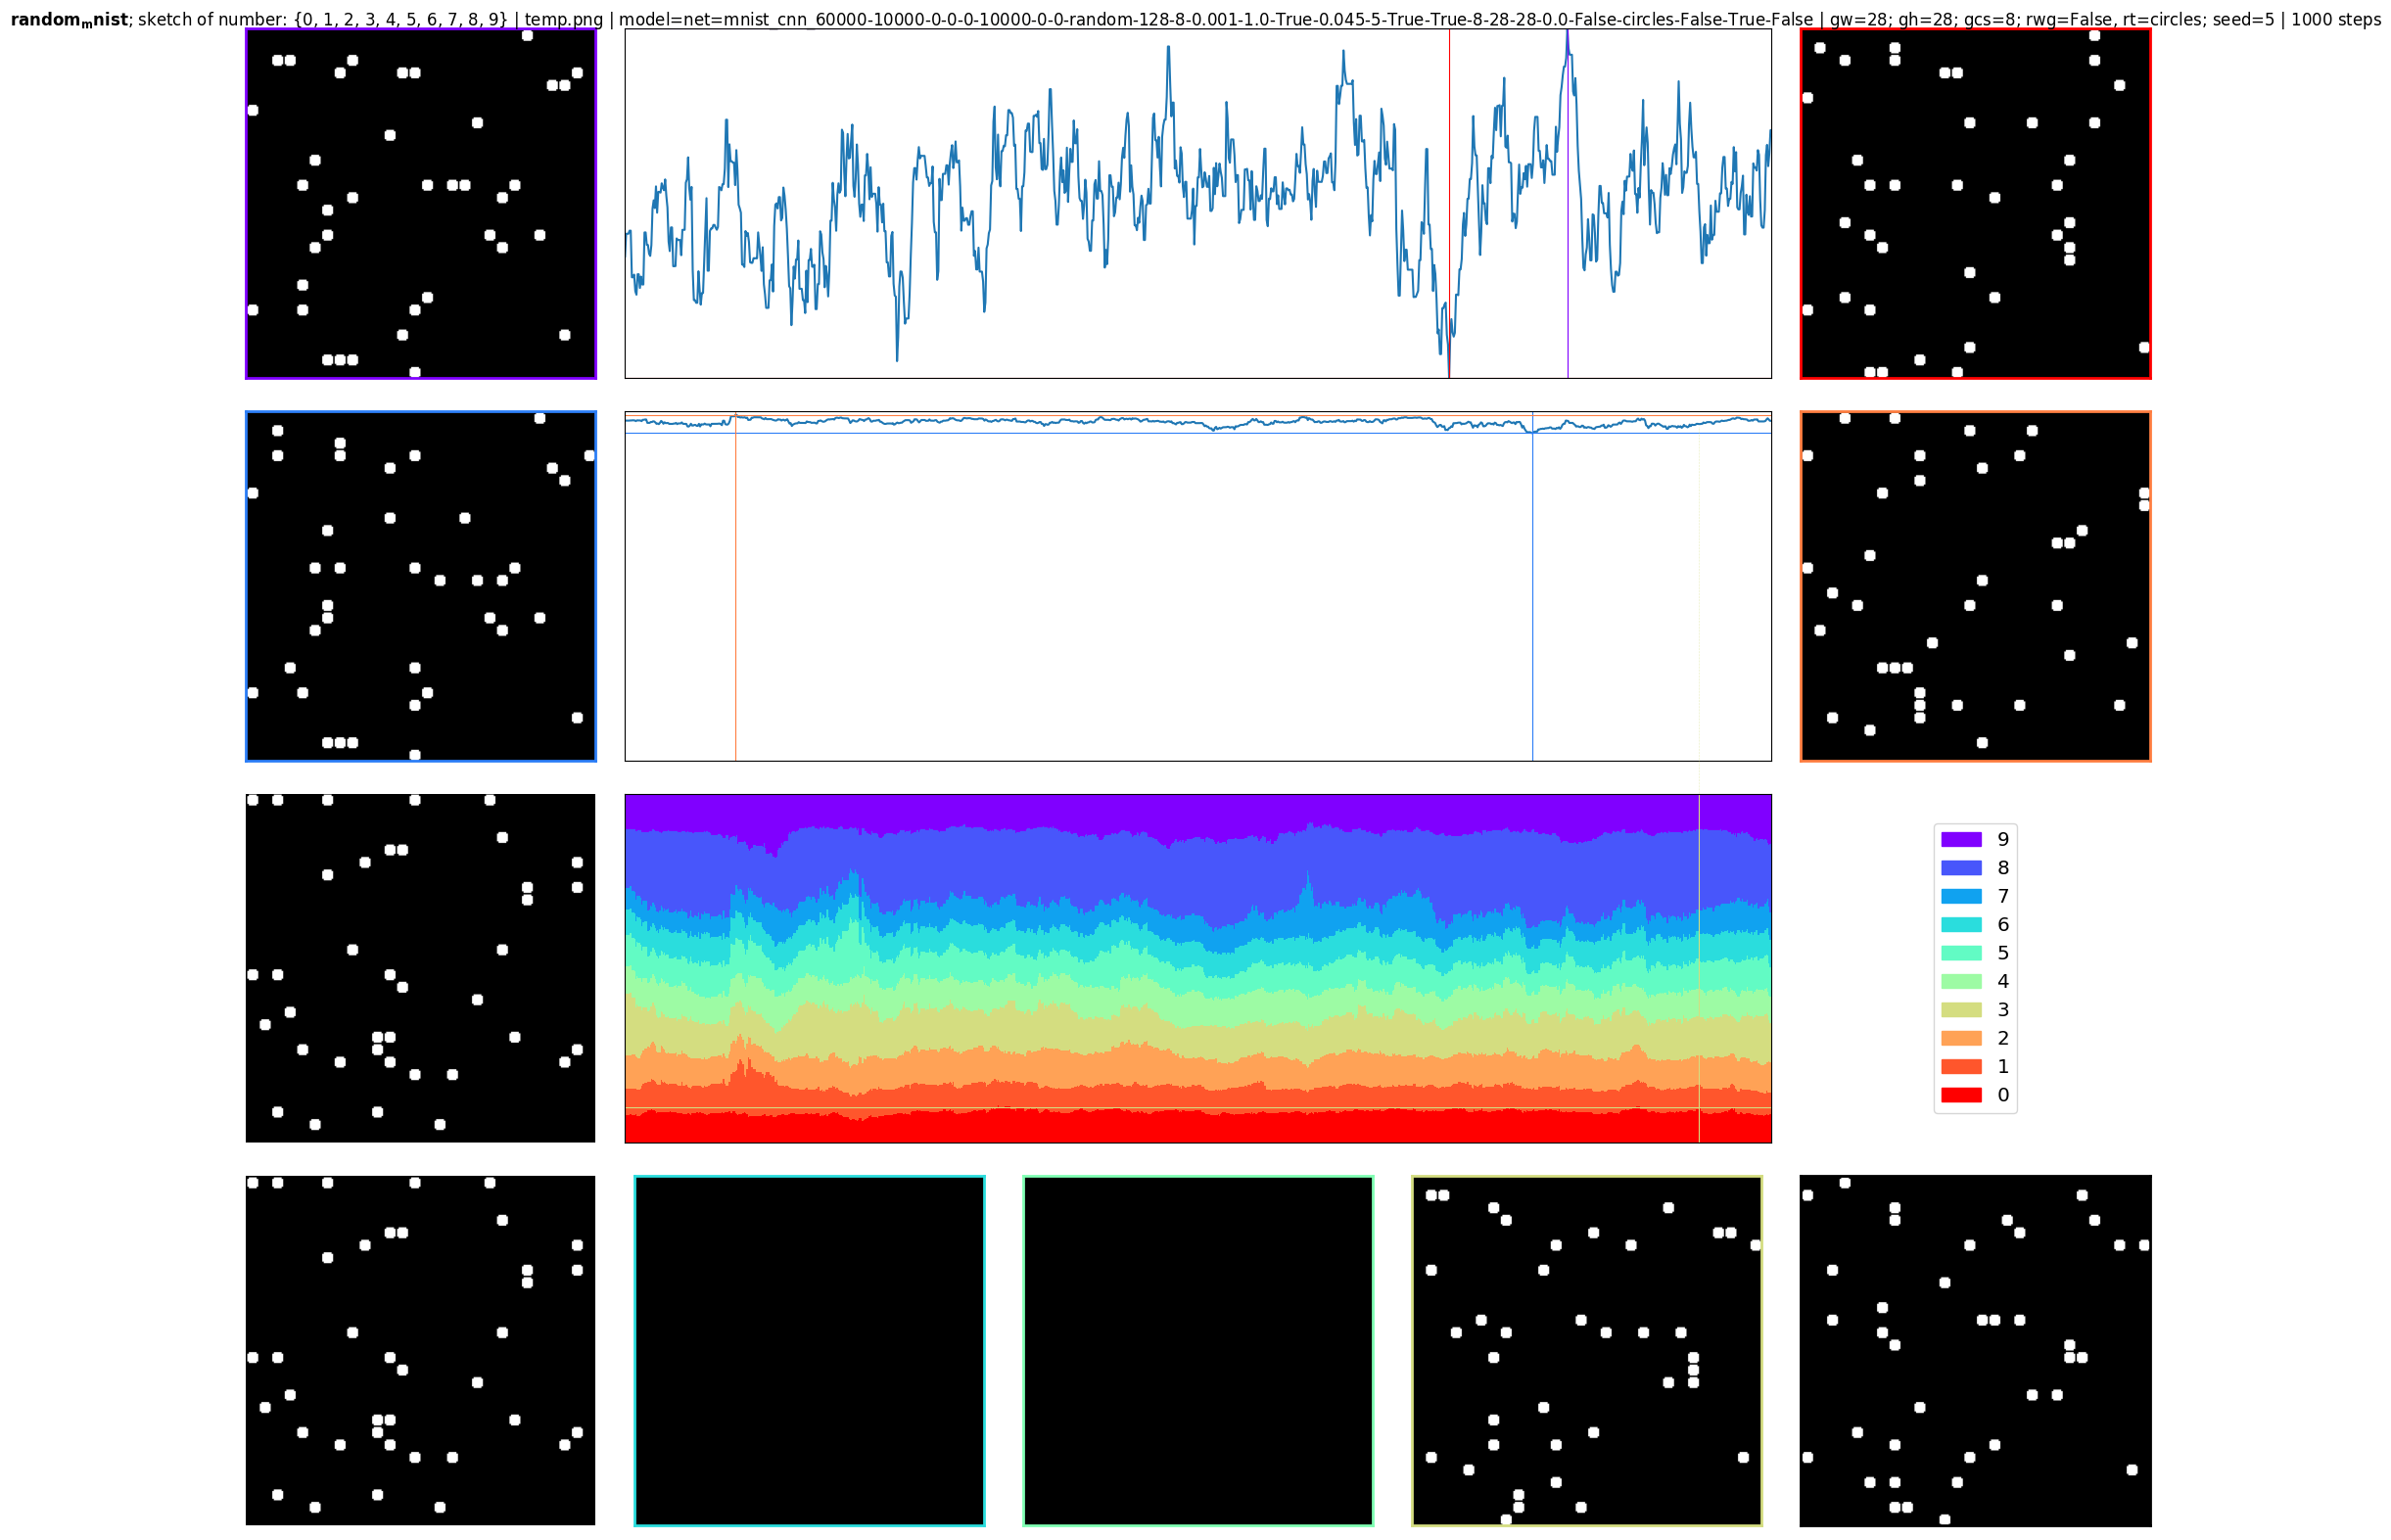

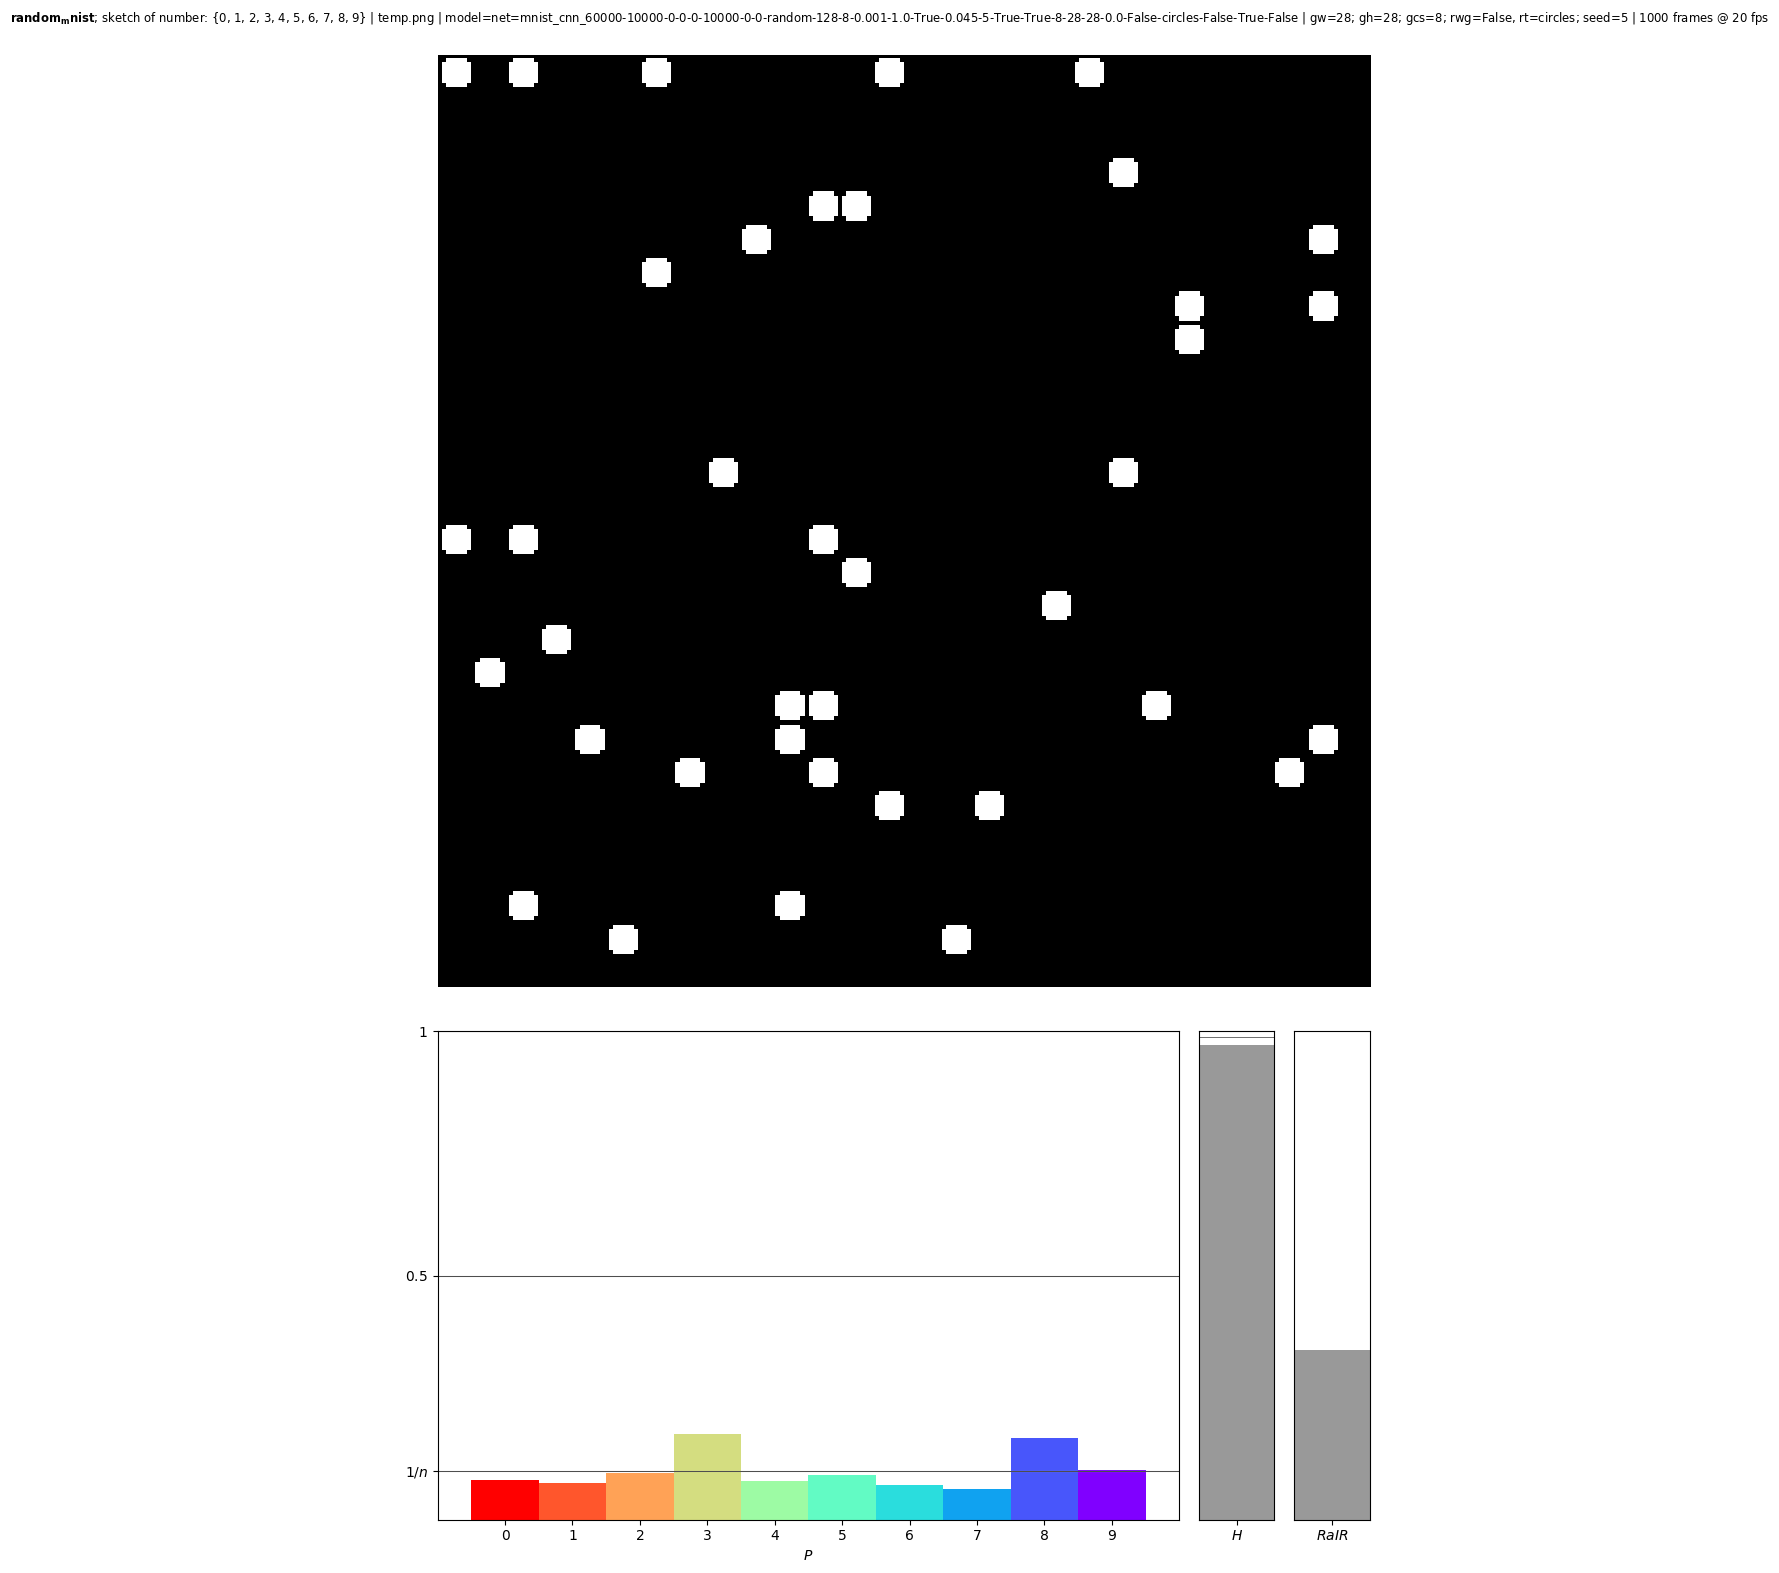

In [23]:
test.rollout(file_name,
             category=category,
             base_dir=base_dir,
             image=file.get_grid_image(),
             # categories=categories,
             label_prefix=label_prefix,
             gridcell_size=gridcell_size,
             grid_width=grid_width,
             grid_height=grid_height,
             threshold_ratio=threshold_ratio,
             convert=convert,
             invert=invert,
             skeleton=skeleton,
             invert_grid=False,
             render_w_grid=render_w_grid,
             render_type=render_type,
             # seed=seed,
             overwrite=overwrite,
             overwrite_plot=overwrite_plot,
             overwrite_animation=overwrite_animation,
             model_name=model_name,
             model_version=model_,
             model_=(model, preprocess),
             device=device,
             frames=frames,
             interval=interval,
             target=target)

INFO:test:>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
DEBUG:test:> base_dir='data/mnist'
DEBUG:test:> model_name='net' @ model_version='results/__models/mnist_cnn_60000-10000-0-0-0-10000-0-0-random-128-8-0.001-1.0-True-0.045-5-True-True-8-28-28-0.0-False-circles-False-True-False.pt'
DEBUG:test:> grid ~ [28 x 28] * 8 > threshold_ratio=0.0
DEBUG:test:> invert_grid=False
DEBUG:test:> render_w_grid=False
DEBUG:test:> render_type='circles'
DEBUG:test:> seed=5
DEBUG:test:> overwrite=True ; overwrite_plot=True | overwrite_animation=True
DEBUG:test:> kwargs={'convert': '1', 'invert': False, 'skeleton': True, 'target': 'combinations_cuda'}
DEBUG:test:--------------------------------------------------------------------------------------------------

> Pre-processing images...:   0%|          | 0/1000 [00:00<?, ?it/s]

DEBUG:test:>> Saved pre-processed images @ file:///is/sg2/pgoyal/Desktop/Projects/mbrl-semantics/mbrl/environments/data/mnist/0/1001/pre-processed_28_28_8_False_False_circles.
DEBUG:test:>> Saved processed images @ file:///is/sg2/pgoyal/Desktop/Projects/mbrl-semantics/mbrl/environments/data/mnist/0/1001/processed_28_28_8_False_False_circles_net=mnist_cnn_60000-10000-0-0-0-10000-0-0-random-128-8-0.001-1.0-True-0.045-5-True-True-8-28-28-0.0-False-circles-False-True-False.
DEBUG:test:>> Saved meta data @ file:///is/sg2/pgoyal/Desktop/Projects/mbrl-semantics/mbrl/environments/data/mnist/0/1001/pre-processed_28_28_8_False_False_circles/meta.pickle.
DEBUG:test:> Running inference on net=mnist_cnn_60000-10000-0-0-0-10000-0-0-random-128-8-0.001-1.0-True-0.045-5-True-True-8-28-28-0.0-False-circles-False-True-False model ...


> Running Inference...:   0%|          | 0/1000 [00:00<?, ?it/s]

DEBUG:test:>> Saving results @ file:///is/sg2/pgoyal/Desktop/Projects/mbrl-semantics/mbrl/environments/data/mnist/0/1001/results/results_28_28_8_False_False_circles_net=mnist_cnn_60000-10000-0-0-0-10000-0-0-random-128-8-0.001-1.0-True-0.045-5-True-True-8-28-28-0.0-False-circles-False-True-False_sketch-of-number+0_1_2_3_4_5_6_7_8_9+5_1000.pickle.
INFO:test:> For the original file, entropy/max_entropy=0.94, and entropy/grid_entropy=1.26
DEBUG:test:> Plotting results...
DEBUG:test:>> Saved plot @ file:///is/sg2/pgoyal/Desktop/Projects/mbrl-semantics/mbrl/environments/results/combinations_cuda/0/plot_1001_28_28_8_False_False_circles_net=mnist_cnn_60000-10000-0-0-0-10000-0-0-random-128-8-0.001-1.0-True-0.045-5-True-True-8-28-28-0.0-False-circles-False-True-False_sketch-of-number+0_1_2_3_4_5_6_7_8_9+5_1000.png.
DEBUG:test:> Creating animation with interval 50 ms.
DEBUG:test:>> Saved animation @ file:///is/sg2/pgoyal/Desktop/Projects/mbrl-semantics/mbrl/environments/results/combinations_cuda/

PearsonRResult(statistic=-0.5796204216792068, pvalue=8.189337020869244e-91)

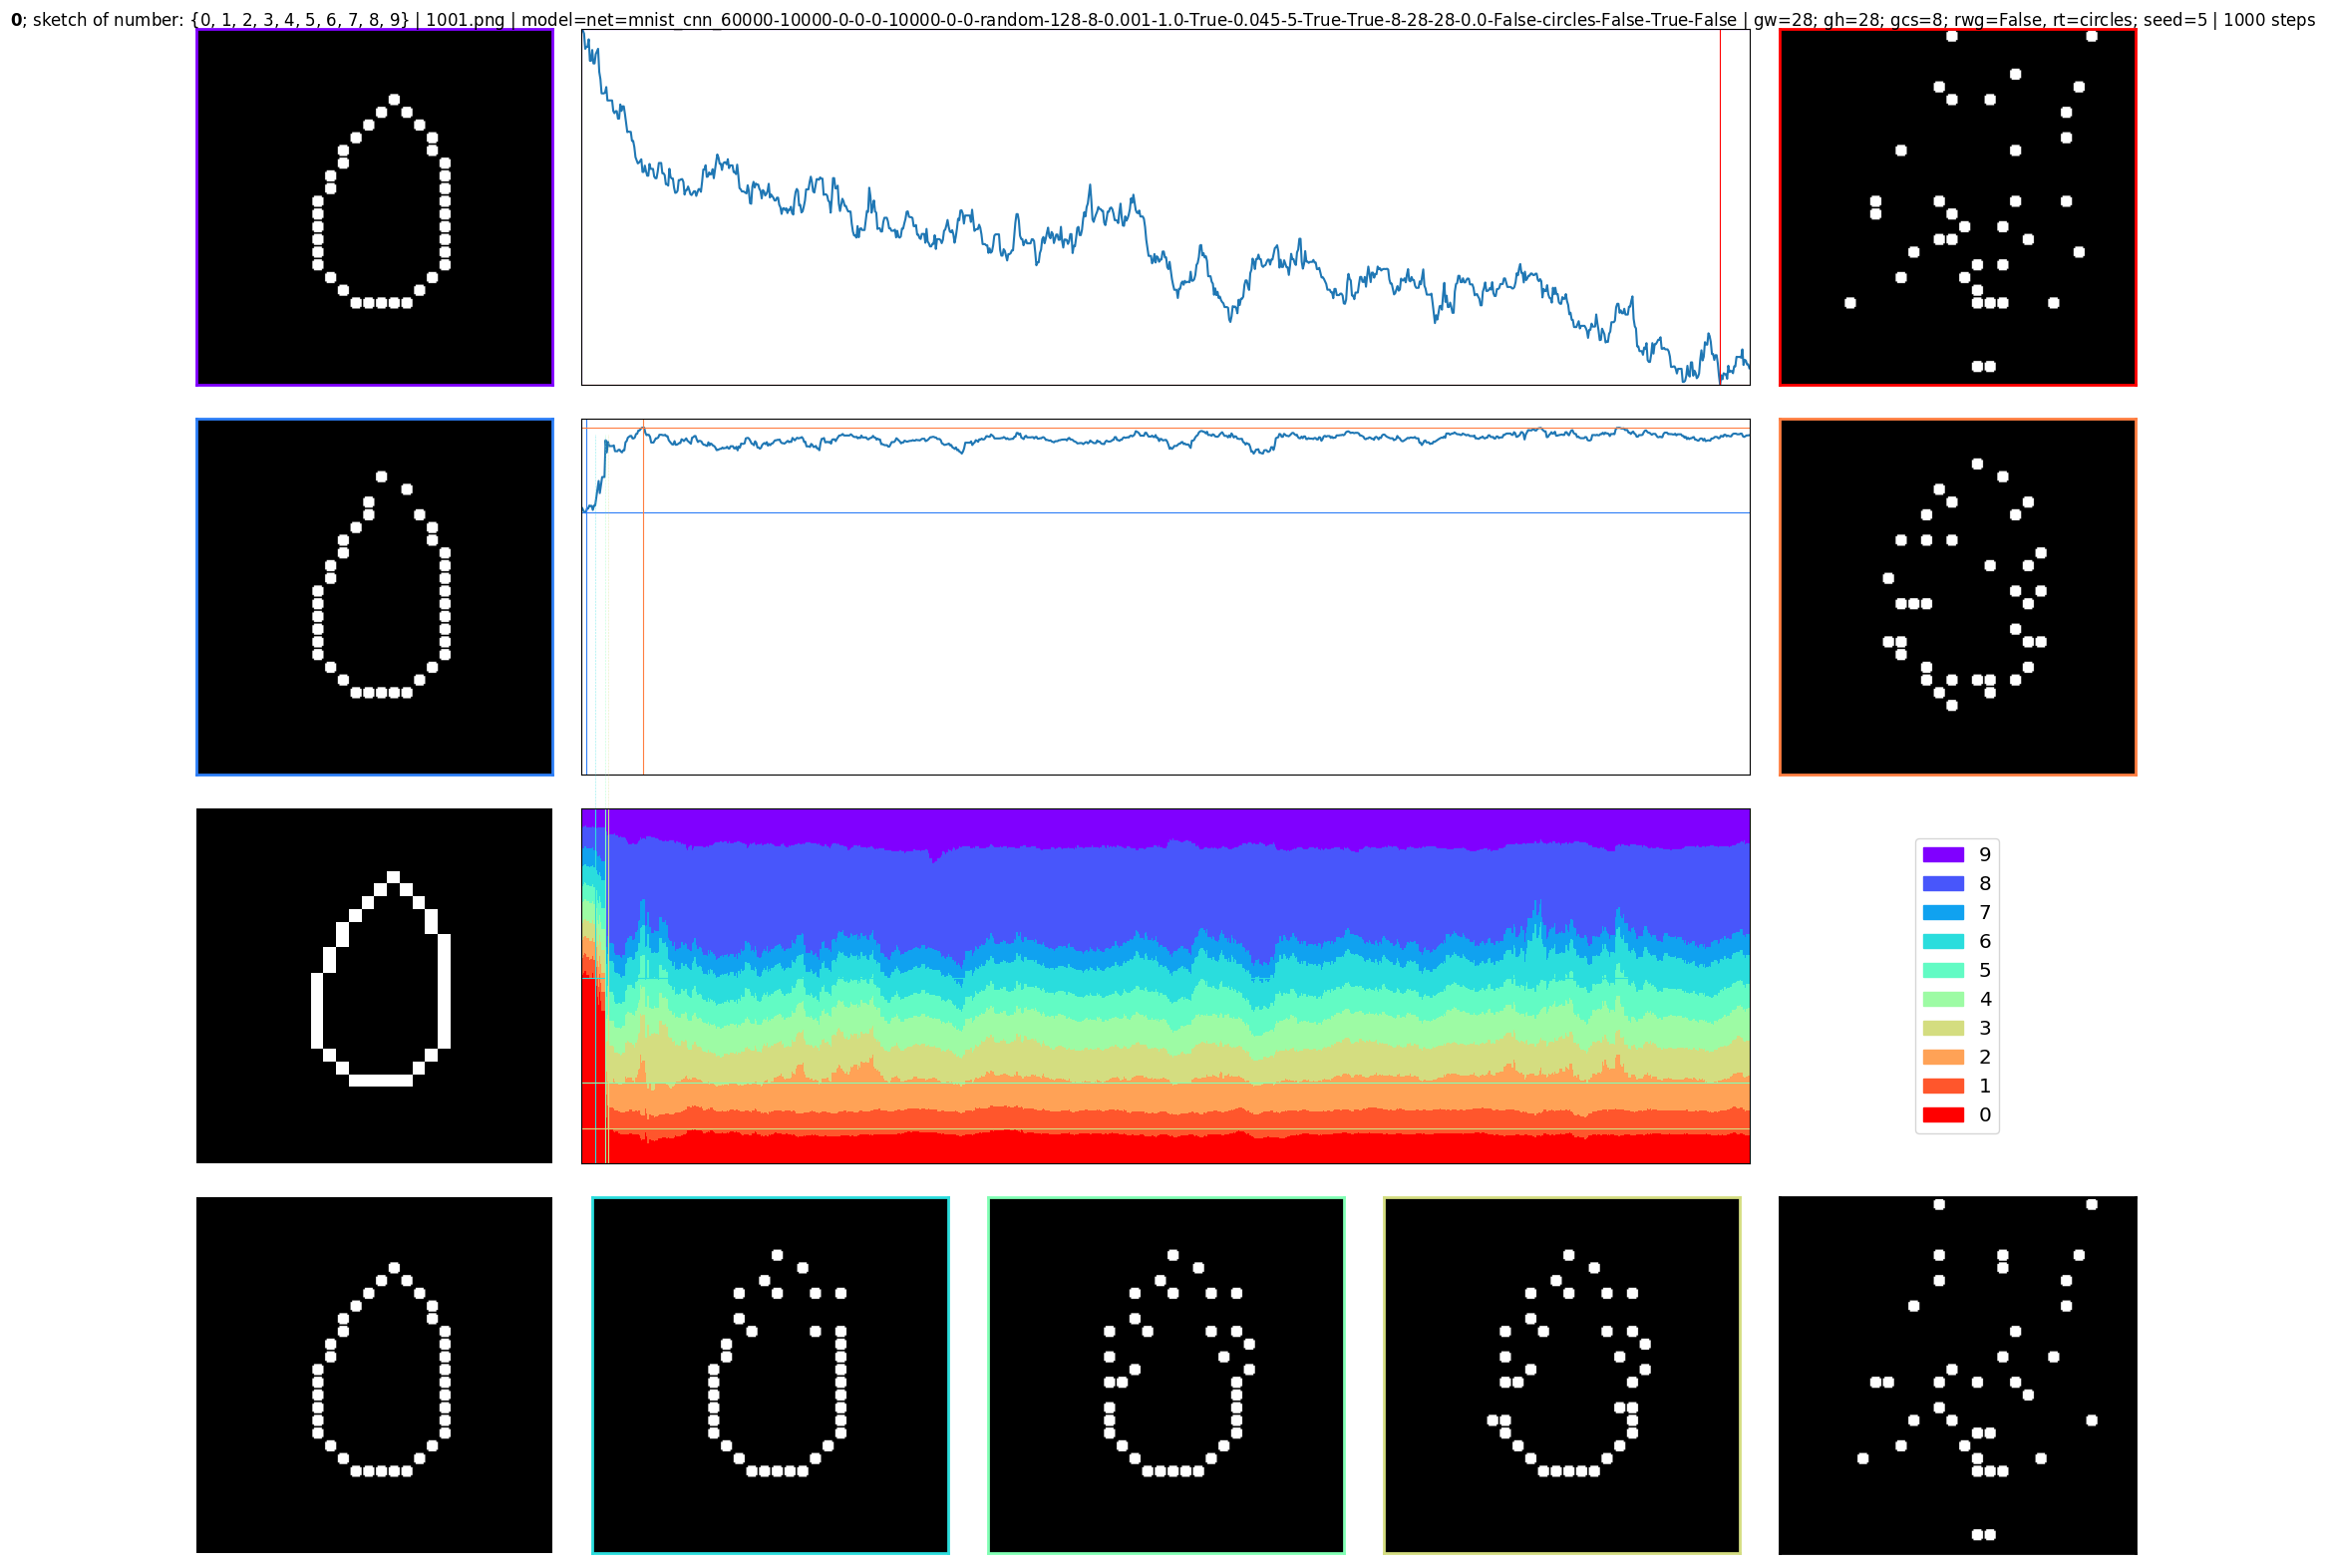

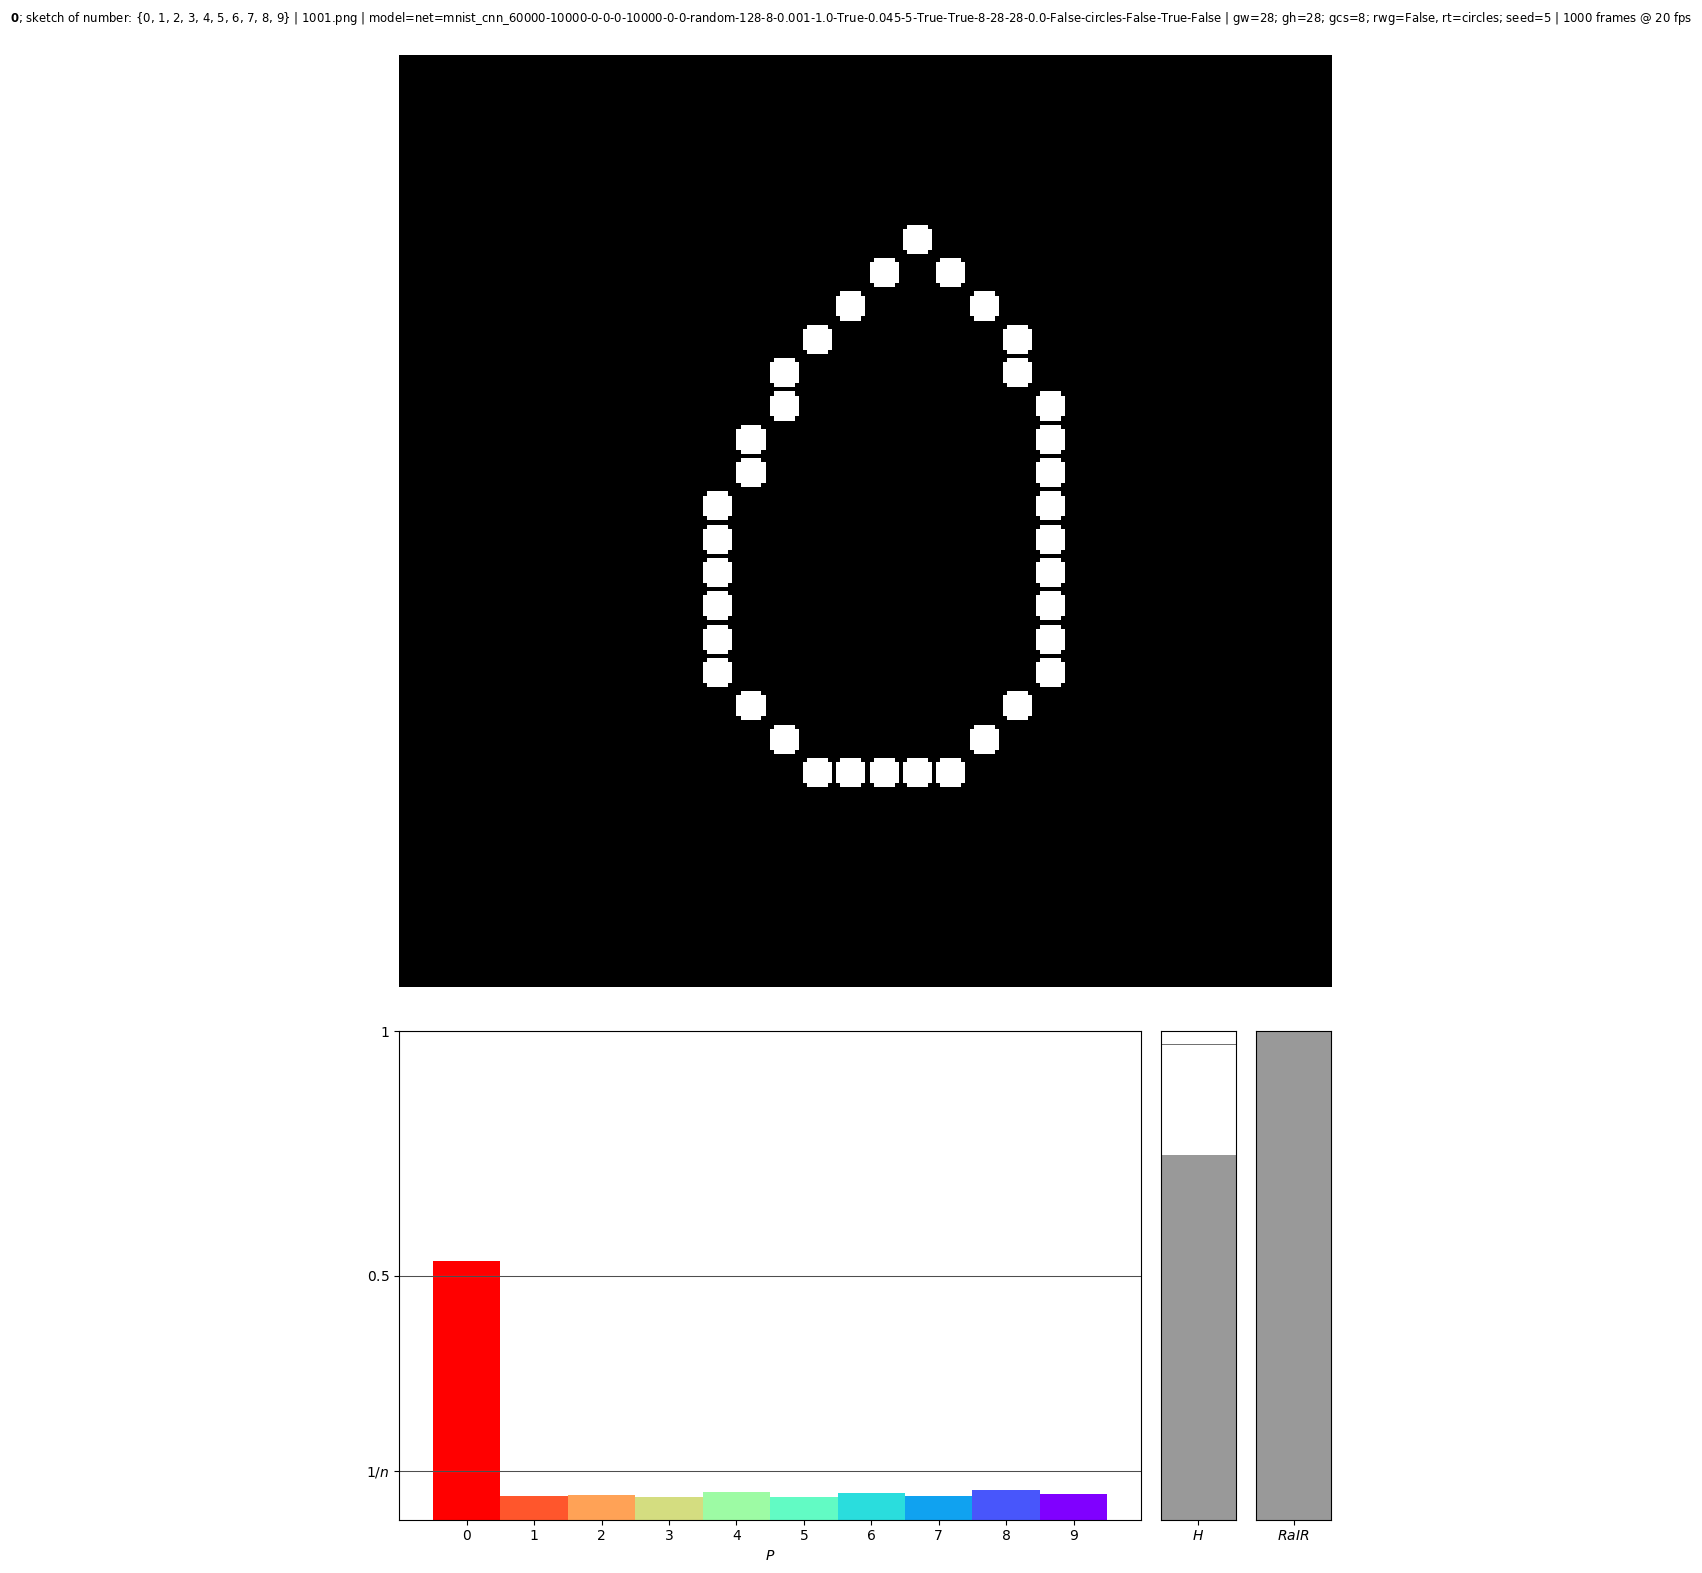

In [24]:
test.rollout('1001.png',
             category='0',
             base_dir='data/mnist',
             # image=file.get_grid_image(),
             # categories=categories,
             label_prefix=label_prefix,
             gridcell_size=gridcell_size,
             grid_width=grid_width,
             grid_height=grid_height,
             threshold_ratio=threshold_ratio,
             convert=convert,
             invert=invert,
             skeleton=True,
             invert_grid=False,
             render_w_grid=render_w_grid,
             render_type=render_type,
             # seed=seed,
             overwrite=overwrite,
             overwrite_plot=overwrite_plot,
             overwrite_animation=overwrite_animation,
             model_name=model_name,
             model_version=model_,
             model_=(model, preprocess),
             device=device,
             frames=frames,
             interval=interval,
             target=target)